Importing the necessary package 

In [621]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from numpy.linalg import eig
import matplotlib.pyplot as plt
import seaborn as sn
import plotly.express as px
import plotly.graph_objects as go
import os
from factor_analyzer import Rotator
import seaborn as sns

Reading the data from the .csv file 

In [622]:
df = pd.read_csv('Variable in DAs.csv', encoding='latin-1', low_memory=False)
df

,CENSUS_YEAR,DGUID,ALT_GEO_CODE,GEO_LEVEL,GEO_NAME,CHARACTERISTIC_ID,CHARACTERISTIC_NAME,CHARACTERISTIC_NOTE,C1_COUNT_TOTAL,C2_COUNT_MEN+,C3_COUNT_WOMEN+,C10_RATE_TOTAL,C11_RATE_MEN+,C12_RATE_WOMEN+,Unnamed: 14
0,2021,2021S051259150307,59150307,Dissemination area,59150307,126,NaN,11.0,590.0,315.0,275.0,100.0,100.0,100.0,NaN
1,2021,2021S051259150307,59150307,Dissemination area,59150307,127,Number of total income recipients aged 15 ye...,NaN,555.0,295.0,265.0,94.1,93.7,96.4,NaN
2,2021,2021S051259150307,59150307,Dissemination area,59150307,128,Average total income in 2020 among recipie...,NaN,63400.0,77000.0,48400.0,63400.0,77000.0,48400.0,NaN
3,2021,2021S051259150307,59150307,Dissemination area,59150307,129,Number of after-tax income recipients aged 1...,NaN,555.0,295.0,265.0,94.1,93.7,96.4,NaN
4,2021,2021S051259150307,59150307,Dissemination area,59150307,130,Average after-tax income in 2020 among rec...,NaN,51600.0,60400.0,41600.0,51600.0,60400.0,41600.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471883,2021,2021S051259154196,59154196,Dissemination area,59154196,2619,Between 6 a.m. and 6:59 a.m.,NaN,50.0,20.0,25.0,13.5,9.8,14.7,NaN
471884,2021,2021S051259154196,59154196,Dissemination area,59154196,2620,Between 7 a.m. and 7:59 a.m.,NaN,110.0,70.0,40.0,29.7,34.1,23.5,NaN
471885,2021,2021S051259154196,59154196,Dissemination area,59154196,2621,Between 8 a.m. and 8:59 a.m.,NaN,50.0,15.0,30.0,13.5,7.3,17.6,NaN
471886,2021,2021S051259154196,59154196,Dissemination area,59154196,2622,Between 9 a.m. and 11:59 a.m.,NaN,85.0,40.0,45.0,23.0,19.5,26.5,NaN


Selecting only specific characteristics 

In [623]:
selected_variables = ['1539', '1540', '1462', '1463', '1464', '1999', '2001', '1993', 
                      '1416', '1453', '2620', '1827', '1757', '1771', '1705', '1713', 
                      '1684', '1403', '1082', '252', '1467', '151', '1488',
                      '128', '2226', '2224', '2225', '2227', '2261', '1441', '1442', 
                      '1443', '1444', '2607', '1976', '1433', '1451', '2223','1715']
selected_variables = list(map(int, selected_variables))
filtered_df = df[df['CHARACTERISTIC_ID'].isin(selected_variables)]
filtered_df

,CENSUS_YEAR,DGUID,ALT_GEO_CODE,GEO_LEVEL,GEO_NAME,CHARACTERISTIC_ID,CHARACTERISTIC_NAME,CHARACTERISTIC_NOTE,C1_COUNT_TOTAL,C2_COUNT_MEN+,C3_COUNT_WOMEN+,C10_RATE_TOTAL,C11_RATE_MEN+,C12_RATE_WOMEN+,Unnamed: 14
2,2021,2021S051259150307,59150307,Dissemination area,59150307,128,Average total income in 2020 among recipie...,NaN,63400.0,77000.0,48400.0,63400.0,77000.0,48400.0,NaN
25,2021,2021S051259150307,59150307,Dissemination area,59150307,151,Government transfers (%),20.0,12.7,9.2,19.2,12.7,9.2,19.2,NaN
55,2021,2021S051259150307,59150307,Dissemination area,59150307,252,Average total income of household in 2020 ($),NaN,133000.0,NaN,NaN,133000.0,NaN,NaN,NaN
82,2021,2021S051259150307,59150307,Dissemination area,59150307,1082,Non-official languages,NaN,250.0,120.0,135.0,35.0,32.9,39.1,NaN
104,2021,2021S051259150307,59150307,Dissemination area,59150307,1403,Indigenous identity,45.0,10.0,0.0,10.0,1.4,0.0,2.9,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471794,2021,2021S051259154196,59154196,Dissemination area,59154196,2226,Unemployed,NaN,55.0,20.0,30.0,NaN,NaN,NaN,NaN
471795,2021,2021S051259154196,59154196,Dissemination area,59154196,2227,Not in the labour force,NaN,225.0,95.0,135.0,NaN,NaN,NaN,NaN
471827,2021,2021S051259154196,59154196,Dissemination area,59154196,2261,All industries,191.0,485.0,270.0,215.0,96.0,100.0,93.5,NaN
471873,2021,2021S051259154196,59154196,Dissemination area,59154196,2607,Public transit,NaN,120.0,45.0,75.0,32.4,22.0,44.1,NaN


As the last 'GEO' was repeated twice, we will drop the records that have been duplicated in the dataframe

In [624]:
filtered_df = filtered_df.drop_duplicates()

For our pre processing step we only need to consider the following characteristic ids:2223, 2224, 2225, 2226, 2227, 128, 252, 1488 
    

In [625]:
# Focusing on the data that is needed for the computation 
Considered_df = filtered_df[filtered_df['CHARACTERISTIC_ID'].isin([2223, 2224, 2225, 2226, 2227, 128, 252, 1488])]
Considered_df

,CENSUS_YEAR,DGUID,ALT_GEO_CODE,GEO_LEVEL,GEO_NAME,CHARACTERISTIC_ID,CHARACTERISTIC_NAME,CHARACTERISTIC_NOTE,C1_COUNT_TOTAL,C2_COUNT_MEN+,C3_COUNT_WOMEN+,C10_RATE_TOTAL,C11_RATE_MEN+,C12_RATE_WOMEN+,Unnamed: 14
2,2021,2021S051259150307,59150307,Dissemination area,59150307,128,Average total income in 2020 among recipie...,NaN,63400.0,77000.0,48400.0,63400.0,77000.0,48400.0,NaN
55,2021,2021S051259150307,59150307,Dissemination area,59150307,252,Average total income of household in 2020 ($),NaN,133000.0,NaN,NaN,133000.0,NaN,NaN,NaN
174,2021,2021S051259150307,59150307,Dissemination area,59150307,1488,Median value of dwellings ($),66.0,1700000.0,NaN,NaN,1700000.0,NaN,NaN,NaN
396,2021,2021S051259150307,59150307,Dissemination area,59150307,2223,Total - Population aged 15 years and over by l...,184.0,590.0,315.0,275.0,NaN,NaN,NaN,NaN
397,2021,2021S051259150307,59150307,Dissemination area,59150307,2224,In the labour force,NaN,405.0,220.0,185.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471374,2021,2021S051259154196,59154196,Dissemination area,59154196,2223,Total - Population aged 15 years and over by l...,184.0,730.0,370.0,360.0,NaN,NaN,NaN,NaN
471375,2021,2021S051259154196,59154196,Dissemination area,59154196,2224,In the labour force,NaN,505.0,275.0,225.0,NaN,NaN,NaN,NaN
471376,2021,2021S051259154196,59154196,Dissemination area,59154196,2225,Employed,NaN,450.0,255.0,200.0,NaN,NaN,NaN,NaN
471377,2021,2021S051259154196,59154196,Dissemination area,59154196,2226,Unemployed,NaN,55.0,20.0,30.0,NaN,NaN,NaN,NaN


# Computation for labor rates

We will compute the rates based on the subset of the data. At each time we would filter the data for each specific 'GEO_NAME' and then we would compute the rates based on the data for that 'GEO_NAME'. 

In this code we would start from an empty dataframe 'Filled_df' and at each time we would add the data computed for each 'GEO_NAME' to this dataframe at the end of each cycle. 

__NOTE:__ in our computation, we would also remove the characteristic that was not needed '2223' from the data of each 'GEO_NAME' and then add the data to our global dataframe. 

In [626]:
# The dataframe that would contain the filled values for the rates
Filled_df = pd.DataFrame()

# We will compute the rates for each 'GEO_NAME' one by one 
for geo in Considered_df['GEO_NAME'].unique(): 
    
    # Take the useful data for the computation of the rate of this 'GEO_NAME'
    One_sample = Considered_df[(Considered_df['GEO_NAME'] == geo) & 
                               Considered_df['CHARACTERISTIC_ID'].isin([2223, 2224, 2225, 2226, 2227])].copy()
    
    # Take the values of the total population 
    Denomenator = One_sample[One_sample['CHARACTERISTIC_ID'] == 2223][['C1_COUNT_TOTAL', 'C2_COUNT_MEN+', 'C3_COUNT_WOMEN+']]
    
    # Take the values of each type of the population 
    Numenator = One_sample[One_sample['CHARACTERISTIC_ID']!= 2223][['C1_COUNT_TOTAL', 'C2_COUNT_MEN+', 'C3_COUNT_WOMEN+']]
    
    # Computing the rates and put them in the corresponding cell
    One_sample[['C10_RATE_TOTAL', 'C11_RATE_MEN+', 'C12_RATE_WOMEN+']] = Numenator.divide(np.array(Denomenator)) * 100
    
    # Removing the chracteristic '2223' that is not needed for us which is the total population 
    One_sample = One_sample[One_sample['CHARACTERISTIC_ID'] != 2223]
    
    # Adding the new data for this 'GEO_NAME' to the temporary dataframe that we created
    Filled_df = pd.concat([Filled_df, One_sample])

# Scaling some characteristics 

We will scale the values for these characteristics (128, 252, 1488) and then concat the values to the previously filled data frame. 

In [627]:
# The characteristics that should be scaled
Need_to_scale = [128, 252, 1488]

# For each characteristic
for character_id in Need_to_scale: 
    
    # The data regarding this characteristic 
    temp_df = Considered_df[Considered_df['CHARACTERISTIC_ID'] == character_id].copy()
    
    # Taking the values of this characteristic
    data = np.array(temp_df['C1_COUNT_TOTAL'])
    
    # Creating a scaler
    scaler = MinMaxScaler((0, 100))
    
    # Getting the scaled data
    scaled_data = 100 - scaler.fit_transform(data.reshape(-1, 1))
    
    # Put the scaled value in the right column 
    temp_df['C10_RATE_TOTAL'] = scaled_data
    
    # Adding this subset of data to the datframe that we had before
    Filled_df = pd.concat([Filled_df, temp_df])

After the computations, we would merge the data that was considered and not considered for our computations, in order to get to the initial dataframe (filtered_df), and then sort the values based on the value of the 'GEO_NAME' and the 'CHARACTERISTIC_ID' and resetting the index of the data. 

In [628]:
# The data that has not been considered in the computation
Not_considered_df = filtered_df[~filtered_df['CHARACTERISTIC_ID'].isin([2223, 2224, 2225, 2226, 2227, 128, 252, 1488])].copy()

# Merging the considered and not considered data for the report 
# and sorting the data based on the 'GEO_NAME' and 'CHARACTERISTIC_ID'
Whole_df = pd.concat([Filled_df, Not_considered_df]).sort_values(['GEO_NAME','CHARACTERISTIC_ID']).reset_index(drop = True)

Taking a look at the final resulf of our data. 

In [629]:
Whole_df

,CENSUS_YEAR,DGUID,ALT_GEO_CODE,GEO_LEVEL,GEO_NAME,CHARACTERISTIC_ID,CHARACTERISTIC_NAME,CHARACTERISTIC_NOTE,C1_COUNT_TOTAL,C2_COUNT_MEN+,C3_COUNT_WOMEN+,C10_RATE_TOTAL,C11_RATE_MEN+,C12_RATE_WOMEN+,Unnamed: 14
0,2021,2021S051259150307,59150307,Dissemination area,59150307,128,Average total income in 2020 among recipie...,NaN,63400.0,77000.0,48400.0,92.436798,77000.000000,48400.000000,NaN
1,2021,2021S051259150307,59150307,Dissemination area,59150307,151,Government transfers (%),20.0,12.7,9.2,19.2,12.700000,9.200000,19.200000,NaN
2,2021,2021S051259150307,59150307,Dissemination area,59150307,252,Average total income of household in 2020 ($),NaN,133000.0,NaN,NaN,89.469437,NaN,NaN,NaN
3,2021,2021S051259150307,59150307,Dissemination area,59150307,1082,Non-official languages,NaN,250.0,120.0,135.0,35.000000,32.900000,39.100000,NaN
4,2021,2021S051259150307,59150307,Dissemination area,59150307,1403,Indigenous identity,45.0,10.0,0.0,10.0,1.400000,0.000000,2.900000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,2021,2021S051259154196,59154196,Dissemination area,59154196,2226,Unemployed,NaN,55.0,20.0,30.0,7.534247,5.405405,8.333333,NaN
32577,2021,2021S051259154196,59154196,Dissemination area,59154196,2227,Not in the labour force,NaN,225.0,95.0,135.0,30.821918,25.675676,37.500000,NaN
32578,2021,2021S051259154196,59154196,Dissemination area,59154196,2261,All industries,191.0,485.0,270.0,215.0,96.000000,100.000000,93.500000,NaN
32579,2021,2021S051259154196,59154196,Dissemination area,59154196,2607,Public transit,NaN,120.0,45.0,75.0,32.400000,22.000000,44.100000,NaN


Taking a look at the final computation that was done for each 'GEO_NAME' to verify the computation of the rates. 

In [630]:
Whole_df[Whole_df['CHARACTERISTIC_ID'].isin([2223, 2224, 2225, 2226, 2227, 128, 252, 1488])]

,CENSUS_YEAR,DGUID,ALT_GEO_CODE,GEO_LEVEL,GEO_NAME,CHARACTERISTIC_ID,CHARACTERISTIC_NAME,CHARACTERISTIC_NOTE,C1_COUNT_TOTAL,C2_COUNT_MEN+,C3_COUNT_WOMEN+,C10_RATE_TOTAL,C11_RATE_MEN+,C12_RATE_WOMEN+,Unnamed: 14
0,2021,2021S051259150307,59150307,Dissemination area,59150307,128,Average total income in 2020 among recipie...,NaN,63400.0,77000.0,48400.0,92.436798,77000.000000,48400.000000,NaN
2,2021,2021S051259150307,59150307,Dissemination area,59150307,252,Average total income of household in 2020 ($),NaN,133000.0,NaN,NaN,89.469437,NaN,NaN,NaN
17,2021,2021S051259150307,59150307,Dissemination area,59150307,1488,Median value of dwellings ($),66.0,1700000.0,NaN,NaN,82.547170,NaN,NaN,NaN
27,2021,2021S051259150307,59150307,Dissemination area,59150307,2224,In the labour force,NaN,405.0,220.0,185.0,68.644068,69.841270,67.272727,NaN
28,2021,2021S051259150307,59150307,Dissemination area,59150307,2225,Employed,NaN,360.0,195.0,170.0,61.016949,61.904762,61.818182,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32564,2021,2021S051259154196,59154196,Dissemination area,59154196,1488,Median value of dwellings ($),66.0,2000000.0,NaN,NaN,78.616352,NaN,NaN,NaN
32574,2021,2021S051259154196,59154196,Dissemination area,59154196,2224,In the labour force,NaN,505.0,275.0,225.0,69.178082,74.324324,62.500000,NaN
32575,2021,2021S051259154196,59154196,Dissemination area,59154196,2225,Employed,NaN,450.0,255.0,200.0,61.643836,68.918919,55.555556,NaN
32576,2021,2021S051259154196,59154196,Dissemination area,59154196,2226,Unemployed,NaN,55.0,20.0,30.0,7.534247,5.405405,8.333333,NaN


## Final value 

Here we will only keep the necessary value that we want from each characteristic. We will add another column to put the final value that we want from each characteristic. 

For each characteristic except the followings we need the value of 'C10_RATE_TOTAL'

    Unemployed: 'C10_RATE_TOTAL'

    Employed: 'C12_RATE_WOMEN+'

    Not in the laybor force: 'C11_RATE_MEN'

    In the laybor force: 'C12_RATE_WOMEN+'

### Function final value 

We will write another function that based on the type of the characteristic, would take the correct final value of that characteristic. 

In [631]:
# This given one row, would output a specific value 
def final_value(x): 
    
    # If the characteristic id is 2225 or 2224 we need the rate for women 
    if x['CHARACTERISTIC_ID'] in [2225, 2224]: 
        return x['C12_RATE_WOMEN+']
    
    # If the characteristic id is 2227 we need the rate of the men
    elif x['CHARACTERISTIC_ID'] == 2227: 
        return x['C11_RATE_MEN+']

    # In all of other cases we need the value of the rate total 
    else: 
        return x['C10_RATE_TOTAL']
    
# Forming the final value 
Whole_df['Final value'] = Whole_df.apply(final_value, axis = 1)

Taking a look at the output for the final value and verify the final values. 

In [632]:
Whole_df[Whole_df['CHARACTERISTIC_ID'].isin([2223, 2224, 2225, 2226, 2227, 128, 252, 1488])]

,CENSUS_YEAR,DGUID,ALT_GEO_CODE,GEO_LEVEL,GEO_NAME,CHARACTERISTIC_ID,CHARACTERISTIC_NAME,CHARACTERISTIC_NOTE,C1_COUNT_TOTAL,C2_COUNT_MEN+,C3_COUNT_WOMEN+,C10_RATE_TOTAL,C11_RATE_MEN+,C12_RATE_WOMEN+,Unnamed: 14,Final value
0,2021,2021S051259150307,59150307,Dissemination area,59150307,128,Average total income in 2020 among recipie...,NaN,63400.0,77000.0,48400.0,92.436798,77000.000000,48400.000000,NaN,92.436798
2,2021,2021S051259150307,59150307,Dissemination area,59150307,252,Average total income of household in 2020 ($),NaN,133000.0,NaN,NaN,89.469437,NaN,NaN,NaN,89.469437
17,2021,2021S051259150307,59150307,Dissemination area,59150307,1488,Median value of dwellings ($),66.0,1700000.0,NaN,NaN,82.547170,NaN,NaN,NaN,82.547170
27,2021,2021S051259150307,59150307,Dissemination area,59150307,2224,In the labour force,NaN,405.0,220.0,185.0,68.644068,69.841270,67.272727,NaN,67.272727
28,2021,2021S051259150307,59150307,Dissemination area,59150307,2225,Employed,NaN,360.0,195.0,170.0,61.016949,61.904762,61.818182,NaN,61.818182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32564,2021,2021S051259154196,59154196,Dissemination area,59154196,1488,Median value of dwellings ($),66.0,2000000.0,NaN,NaN,78.616352,NaN,NaN,NaN,78.616352
32574,2021,2021S051259154196,59154196,Dissemination area,59154196,2224,In the labour force,NaN,505.0,275.0,225.0,69.178082,74.324324,62.500000,NaN,62.500000
32575,2021,2021S051259154196,59154196,Dissemination area,59154196,2225,Employed,NaN,450.0,255.0,200.0,61.643836,68.918919,55.555556,NaN,55.555556
32576,2021,2021S051259154196,59154196,Dissemination area,59154196,2226,Unemployed,NaN,55.0,20.0,30.0,7.534247,5.405405,8.333333,NaN,7.534247


Here we will drop the meaningless column that we had. 

__NOTE:__ if you don't want to drop the last column, simply don't run this cell below. 

In [633]:
Whole_df.drop(['Unnamed: 14'], axis = 1, inplace = True)

In [634]:
fountains = pd.read_csv('Fountains.csv', encoding='latin-1', low_memory=False)
fountains

,GEO_NAME,Fountains
0,59150307.0,0
1,59150307.0,0
2,59150307.0,0
3,59150307.0,0
4,59150307.0,0
...,...,...
32527,59154196.0,0
32528,59154196.0,0
32529,59154196.0,0
32530,59154196.0,0


In [635]:
# Read the CSV file, specifying the encoding and low_memory options if needed
fountains = pd.read_csv('Fountains.csv', encoding='latin-1', low_memory=False)

# Remove duplicate rows based on 'GEO_NAME' column
fountains = fountains.drop_duplicates(subset=['GEO_NAME'], keep='first')

# Extract the 'GEO_NAME' column
geo_names = fountains['GEO_NAME']

# Extract the 'Fountains' column and reshape it to a 2-dimensional array
fountains_data = fountains[['Fountains']].copy()
fountains_2d = fountains_data.values.reshape(-1, 1)

# Create the scaler object and scale the 'Fountains' column
scaler = MinMaxScaler(feature_range=(0, 100))
scaled_fountains = scaler.fit_transform(fountains_2d)

# Create a new DataFrame with the scaled 'Fountains' column and the 'GEO_NAME' column
scaled_data = fountains.copy()
scaled_data['Fountains'] = scaled_fountains.flatten()

# Save the scaled DataFrame to a CSV file
scaled_data.to_csv('scaled_fountains.csv', index=False)

## Pivoting

Now we are ready to pivot the dataframe where in the columns we will find the different characteristics and in the rows we would have the 'DGUID'

In [636]:
# Pivoting the data, where in the columns we would have different characteristics
pivot_df = Whole_df.pivot(index='GEO_NAME', columns='CHARACTERISTIC_NAME', values='Final value')
pivot_df

CHARACTERISTIC_NAME,Average total income in 2020 among recipients ($),Employed,Unemployed,1960 or before,1961 to 1980,1981 to 1990,1991 to 2000,5 to 14 years,65 to 74 years,75 to 84 years,...,Not in the labour force,One-maintainer household,"Postsecondary certificate, diploma or degree",Public transit,Renter,"South Asian, n.o.s.",Spending 30% or more of income on shelter costs,Total visible minority population,Under 5 years,Average number of rooms per dwelling
GEO_NAME,,,,,,,,,,,,,,,,,,,,,
59150307,92.436798,61.818182,6.779661,38.9,16.7,3.7,18.5,23.7,11.1,11.1,...,30.158730,51.9,60.2,11.5,27.8,NaN,22.6,33.1,10.5,7.2
59150308,91.891325,68.085106,4.255319,68.2,6.8,4.5,6.8,21.9,18.2,4.5,...,30.434783,50.0,64.9,14.6,29.5,NaN,26.7,33.6,21.9,6.5
59150309,94.073219,70.000000,3.636364,38.5,9.6,5.8,5.8,9.5,13.5,3.8,...,28.813559,40.4,58.7,29.5,38.5,NaN,23.1,45.3,4.8,5.4
59150310,94.996329,74.626866,8.396947,20.3,29.1,3.8,5.1,17.9,3.8,NaN,...,14.062500,60.8,62.6,38.9,78.5,NaN,44.3,40.9,7.7,3.3
59150311,95.206126,52.631579,10.843373,36.1,11.1,11.1,16.7,19.4,22.2,8.3,...,35.555556,52.8,49.4,17.1,44.4,NaN,30.6,64.9,NaN,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59154192,86.016994,63.440860,4.444444,3.0,24.8,53.5,9.9,19.0,11.9,6.9,...,24.137931,56.4,87.2,6.3,9.9,NaN,24.0,23.2,9.5,4.7
59154193,90.548621,73.809524,4.678363,5.9,31.4,52.0,7.8,18.2,11.8,3.9,...,24.137931,48.0,82.5,14.5,56.9,NaN,23.5,24.9,10.9,3.7
59154194,95.415924,45.161290,7.142857,6.5,21.7,30.4,13.0,15.9,13.0,NaN,...,28.000000,43.5,49.1,26.9,56.5,3.7,26.1,64.2,7.2,5.2


## Final preprocessing 

In this section we would perform the final preprocessing steps in the data. Here we will update the rates for a specific characterstic and merge some characteristic to construct a new one. 

## Postsecondary rate update. 

The previous version of the values is: 

In [637]:
pivot_df['  Postsecondary certificate, diploma or degree']

GEO_NAME
59150307    60.2
59150308    64.9
59150309    58.7
59150310    62.6
59150311    49.4
            ... 
59154192    87.2
59154193    82.5
59154194    49.1
59154195    53.2
59154196    44.5
Name:   Postsecondary certificate, diploma or degree, Length: 1023, dtype: float64

In [638]:
# Updating the values 
pivot_df['  Postsecondary certificate, diploma or degree'] = 100 - pivot_df['  Postsecondary certificate, diploma or degree']
pivot_df['  Postsecondary certificate, diploma or degree']

GEO_NAME
59150307    39.8
59150308    35.1
59150309    41.3
59150310    37.4
59150311    50.6
            ... 
59154192    12.8
59154193    17.5
59154194    50.9
59154195    46.8
59154196    55.5
Name:   Postsecondary certificate, diploma or degree, Length: 1023, dtype: float64

## Columns aggregate: 2000 and before 

In [639]:
# Forming the new column
pivot_df['2000 and before'] = pivot_df[['  1960 or before', '  1961 to 1980', '  1981 to 1990', '  1991 to 2000']].sum(axis = 1)

# Removing the previous columns from the data 
pivot_df.drop(['  1960 or before', '  1961 to 1980', '  1981 to 1990', '  1991 to 2000'], axis = 1, inplace = True)
pivot_df

CHARACTERISTIC_NAME,Average total income in 2020 among recipients ($),Employed,Unemployed,5 to 14 years,65 to 74 years,75 to 84 years,85 years and over,African American,All industries,Average total income of household in 2020 ($),...,One-maintainer household,"Postsecondary certificate, diploma or degree",Public transit,Renter,"South Asian, n.o.s.",Spending 30% or more of income on shelter costs,Total visible minority population,Under 5 years,Average number of rooms per dwelling,2000 and before
GEO_NAME,,,,,,,,,,,,,,,,,,,,,
59150307,92.436798,61.818182,6.779661,23.7,11.1,11.1,5.6,NaN,96.3,89.469437,...,51.9,39.8,11.5,27.8,NaN,22.6,33.1,10.5,7.2,77.8
59150308,91.891325,68.085106,4.255319,21.9,18.2,4.5,9.1,NaN,100.0,89.671172,...,50.0,35.1,14.6,29.5,NaN,26.7,33.6,21.9,6.5,86.3
59150309,94.073219,70.000000,3.636364,9.5,13.5,3.8,NaN,NaN,96.1,91.285051,...,40.4,41.3,29.5,38.5,NaN,23.1,45.3,4.8,5.4,59.7
59150310,94.996329,74.626866,8.396947,17.9,3.8,NaN,2.5,NaN,99.1,94.452290,...,60.8,37.4,38.9,78.5,NaN,44.3,40.9,7.7,3.3,58.3
59150311,95.206126,52.631579,10.843373,19.4,22.2,8.3,NaN,NaN,96.2,91.285051,...,52.8,50.6,17.1,44.4,NaN,30.6,64.9,NaN,6.0,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59154192,86.016994,63.440860,4.444444,19.0,11.9,6.9,3.0,NaN,100.0,86.645148,...,56.4,12.8,6.3,9.9,NaN,24.0,23.2,9.5,4.7,91.2
59154193,90.548621,73.809524,4.678363,18.2,11.8,3.9,NaN,NaN,99.2,90.861408,...,48.0,17.5,14.5,56.9,NaN,23.5,24.9,10.9,3.7,97.1
59154194,95.415924,45.161290,7.142857,15.9,13.0,NaN,8.7,NaN,98.6,91.184184,...,43.5,50.9,26.9,56.5,3.7,26.1,64.2,7.2,5.2,71.6


## Columns aggregate: 65 year and over

In [640]:
# Forming the new column
pivot_df['65 years and over'] = pivot_df[['  65 to 74 years', '  75 to 84 years', '  85 years and over']].sum(axis = 1)

# Removing the previous columns from the data 
pivot_df.drop(['  65 to 74 years', '  75 to 84 years', '  85 years and over'], axis = 1, inplace = True)
pivot_df

CHARACTERISTIC_NAME,Average total income in 2020 among recipients ($),Employed,Unemployed,5 to 14 years,African American,All industries,Average total income of household in 2020 ($),Between 7 a.m. and 7:59 a.m.,"Black, n.o.s.","Caucasian (White), n.o.s.",...,"Postsecondary certificate, diploma or degree",Public transit,Renter,"South Asian, n.o.s.",Spending 30% or more of income on shelter costs,Total visible minority population,Under 5 years,Average number of rooms per dwelling,2000 and before,65 years and over
GEO_NAME,,,,,,,,,,,,,,,,,,,,,
59150307,92.436798,61.818182,6.779661,23.7,NaN,96.3,89.469437,23.1,NaN,NaN,...,39.8,11.5,27.8,NaN,22.6,33.1,10.5,7.2,77.8,27.8
59150308,91.891325,68.085106,4.255319,21.9,NaN,100.0,89.671172,17.1,NaN,NaN,...,35.1,14.6,29.5,NaN,26.7,33.6,21.9,6.5,86.3,31.8
59150309,94.073219,70.000000,3.636364,9.5,NaN,96.1,91.285051,18.2,NaN,1.6,...,41.3,29.5,38.5,NaN,23.1,45.3,4.8,5.4,59.7,17.3
59150310,94.996329,74.626866,8.396947,17.9,NaN,99.1,94.452290,23.6,NaN,2.0,...,37.4,38.9,78.5,NaN,44.3,40.9,7.7,3.3,58.3,6.3
59150311,95.206126,52.631579,10.843373,19.4,NaN,96.2,91.285051,20.0,NaN,NaN,...,50.6,17.1,44.4,NaN,30.6,64.9,NaN,6.0,75.0,30.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59154192,86.016994,63.440860,4.444444,19.0,NaN,100.0,86.645148,20.6,NaN,3.8,...,12.8,6.3,9.9,NaN,24.0,23.2,9.5,4.7,91.2,21.8
59154193,90.548621,73.809524,4.678363,18.2,NaN,99.2,90.861408,23.2,NaN,NaN,...,17.5,14.5,56.9,NaN,23.5,24.9,10.9,3.7,97.1,15.7
59154194,95.415924,45.161290,7.142857,15.9,NaN,98.6,91.184184,21.2,NaN,NaN,...,50.9,26.9,56.5,3.7,26.1,64.2,7.2,5.2,71.6,21.7


Then we can look at the final versoin of the data: 

In [641]:
pivot_df

CHARACTERISTIC_NAME,Average total income in 2020 among recipients ($),Employed,Unemployed,5 to 14 years,African American,All industries,Average total income of household in 2020 ($),Between 7 a.m. and 7:59 a.m.,"Black, n.o.s.","Caucasian (White), n.o.s.",...,"Postsecondary certificate, diploma or degree",Public transit,Renter,"South Asian, n.o.s.",Spending 30% or more of income on shelter costs,Total visible minority population,Under 5 years,Average number of rooms per dwelling,2000 and before,65 years and over
GEO_NAME,,,,,,,,,,,,,,,,,,,,,
59150307,92.436798,61.818182,6.779661,23.7,NaN,96.3,89.469437,23.1,NaN,NaN,...,39.8,11.5,27.8,NaN,22.6,33.1,10.5,7.2,77.8,27.8
59150308,91.891325,68.085106,4.255319,21.9,NaN,100.0,89.671172,17.1,NaN,NaN,...,35.1,14.6,29.5,NaN,26.7,33.6,21.9,6.5,86.3,31.8
59150309,94.073219,70.000000,3.636364,9.5,NaN,96.1,91.285051,18.2,NaN,1.6,...,41.3,29.5,38.5,NaN,23.1,45.3,4.8,5.4,59.7,17.3
59150310,94.996329,74.626866,8.396947,17.9,NaN,99.1,94.452290,23.6,NaN,2.0,...,37.4,38.9,78.5,NaN,44.3,40.9,7.7,3.3,58.3,6.3
59150311,95.206126,52.631579,10.843373,19.4,NaN,96.2,91.285051,20.0,NaN,NaN,...,50.6,17.1,44.4,NaN,30.6,64.9,NaN,6.0,75.0,30.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59154192,86.016994,63.440860,4.444444,19.0,NaN,100.0,86.645148,20.6,NaN,3.8,...,12.8,6.3,9.9,NaN,24.0,23.2,9.5,4.7,91.2,21.8
59154193,90.548621,73.809524,4.678363,18.2,NaN,99.2,90.861408,23.2,NaN,NaN,...,17.5,14.5,56.9,NaN,23.5,24.9,10.9,3.7,97.1,15.7
59154194,95.415924,45.161290,7.142857,15.9,NaN,98.6,91.184184,21.2,NaN,NaN,...,50.9,26.9,56.5,3.7,26.1,64.2,7.2,5.2,71.6,21.7


In [642]:
pivot_df.to_csv('pivot_df.csv')

# Adding Fountains on the variables matrix

In [643]:
# Reading the two CSV files
df1 = pd.read_csv('pivot_df.csv')
df2 = pd.read_csv('scaled_fountains.csv')

# Performing an inner join on a common column
merged_df = pd.merge(df1, df2, on='GEO_NAME').round(1)
merged_df = merged_df.iloc[:, 1:]
merged_df

,Average total income in 2020 among recipients ($),Employed,Unemployed,5 to 14 years,African American,All industries,Average total income of household in 2020 ($),Between 7 a.m. and 7:59 a.m.,"Black, n.o.s.","Caucasian (White), n.o.s.",...,Public transit,Renter,"South Asian, n.o.s.",Spending 30% or more of income on shelter costs,Total visible minority population,Under 5 years,Average number of rooms per dwelling,2000 and before,65 years and over,Fountains
0,92.4,61.8,6.8,23.7,NaN,96.3,89.5,23.1,NaN,NaN,...,11.5,27.8,NaN,22.6,33.1,10.5,7.2,77.8,27.8,0.0
1,91.9,68.1,4.3,21.9,NaN,100.0,89.7,17.1,NaN,NaN,...,14.6,29.5,NaN,26.7,33.6,21.9,6.5,86.3,31.8,0.0
2,94.1,70.0,3.6,9.5,NaN,96.1,91.3,18.2,NaN,1.6,...,29.5,38.5,NaN,23.1,45.3,4.8,5.4,59.7,17.3,0.0
3,95.0,74.6,8.4,17.9,NaN,99.1,94.5,23.6,NaN,2.0,...,38.9,78.5,NaN,44.3,40.9,7.7,3.3,58.3,6.3,0.0
4,95.2,52.6,10.8,19.4,NaN,96.2,91.3,20.0,NaN,NaN,...,17.1,44.4,NaN,30.6,64.9,NaN,6.0,75.0,30.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,86.0,63.4,4.4,19.0,NaN,100.0,86.6,20.6,NaN,3.8,...,6.3,9.9,NaN,24.0,23.2,9.5,4.7,91.2,21.8,0.0
1019,90.5,73.8,4.7,18.2,NaN,99.2,90.9,23.2,NaN,NaN,...,14.5,56.9,NaN,23.5,24.9,10.9,3.7,97.1,15.7,0.0
1020,95.4,45.2,7.1,15.9,NaN,98.6,91.2,21.2,NaN,NaN,...,26.9,56.5,3.7,26.1,64.2,7.2,5.2,71.6,21.7,0.0
1021,96.5,43.1,7.9,13.4,NaN,97.3,92.0,30.4,NaN,NaN,...,15.2,39.6,NaN,20.8,91.2,2.4,5.8,72.9,29.3,4.2


# Changing column names 

In [644]:
merged_df.columns = merged_df.columns.str.strip()
merged_df.rename(columns={'Employed': 'Female Employed',
                     'In the labour force': 'Female In the labour force',
                     'Not in the labour force': 'Male Not in the labour force'},
            inplace=True)

# Extracting variable names
variable_names = merged_df.columns.tolist()
merged_df

,Average total income in 2020 among recipients ($),Female Employed,Unemployed,5 to 14 years,African American,All industries,Average total income of household in 2020 ($),Between 7 a.m. and 7:59 a.m.,"Black, n.o.s.","Caucasian (White), n.o.s.",...,Public transit,Renter,"South Asian, n.o.s.",Spending 30% or more of income on shelter costs,Total visible minority population,Under 5 years,Average number of rooms per dwelling,2000 and before,65 years and over,Fountains
0,92.4,61.8,6.8,23.7,NaN,96.3,89.5,23.1,NaN,NaN,...,11.5,27.8,NaN,22.6,33.1,10.5,7.2,77.8,27.8,0.0
1,91.9,68.1,4.3,21.9,NaN,100.0,89.7,17.1,NaN,NaN,...,14.6,29.5,NaN,26.7,33.6,21.9,6.5,86.3,31.8,0.0
2,94.1,70.0,3.6,9.5,NaN,96.1,91.3,18.2,NaN,1.6,...,29.5,38.5,NaN,23.1,45.3,4.8,5.4,59.7,17.3,0.0
3,95.0,74.6,8.4,17.9,NaN,99.1,94.5,23.6,NaN,2.0,...,38.9,78.5,NaN,44.3,40.9,7.7,3.3,58.3,6.3,0.0
4,95.2,52.6,10.8,19.4,NaN,96.2,91.3,20.0,NaN,NaN,...,17.1,44.4,NaN,30.6,64.9,NaN,6.0,75.0,30.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,86.0,63.4,4.4,19.0,NaN,100.0,86.6,20.6,NaN,3.8,...,6.3,9.9,NaN,24.0,23.2,9.5,4.7,91.2,21.8,0.0
1019,90.5,73.8,4.7,18.2,NaN,99.2,90.9,23.2,NaN,NaN,...,14.5,56.9,NaN,23.5,24.9,10.9,3.7,97.1,15.7,0.0
1020,95.4,45.2,7.1,15.9,NaN,98.6,91.2,21.2,NaN,NaN,...,26.9,56.5,3.7,26.1,64.2,7.2,5.2,71.6,21.7,0.0
1021,96.5,43.1,7.9,13.4,NaN,97.3,92.0,30.4,NaN,NaN,...,15.2,39.6,NaN,20.8,91.2,2.4,5.8,72.9,29.3,4.2


## Saving the data

# Creating the correlation matrix

In [645]:
corr_matrix = merged_df.corr().round(3)
corr_matrix

,Average total income in 2020 among recipients ($),Female Employed,Unemployed,5 to 14 years,African American,All industries,Average total income of household in 2020 ($),Between 7 a.m. and 7:59 a.m.,"Black, n.o.s.","Caucasian (White), n.o.s.",...,Public transit,Renter,"South Asian, n.o.s.",Spending 30% or more of income on shelter costs,Total visible minority population,Under 5 years,Average number of rooms per dwelling,2000 and before,65 years and over,Fountains
Average total income in 2020 among recipients ($),1.000,0.001,0.193,-0.191,0.631,-0.043,0.910,-0.014,0.735,-0.064,...,0.404,0.281,0.472,-0.094,0.319,-0.201,-0.282,0.030,-0.107,-0.028
Female Employed,0.001,1.000,-0.006,0.067,-0.624,0.317,0.178,0.144,-0.231,-0.001,...,0.003,0.383,-0.562,0.060,-0.424,0.161,-0.467,0.029,-0.651,0.013
Unemployed,0.193,-0.006,1.000,-0.062,0.413,-0.392,0.220,0.014,0.612,0.038,...,0.208,0.285,-0.061,0.071,-0.006,-0.040,-0.232,0.086,-0.168,-0.005
5 to 14 years,-0.191,0.067,-0.062,1.000,0.189,-0.067,-0.161,0.029,-0.098,-0.043,...,-0.186,-0.107,-0.200,0.125,-0.119,0.112,0.096,-0.102,-0.146,-0.007
African American,0.631,-0.624,0.413,0.189,1.000,-0.385,0.498,-0.735,NaN,0.213,...,0.460,0.165,1.000,0.075,0.024,-0.030,0.286,0.811,0.270,-0.299
All industries,-0.043,0.317,-0.392,-0.067,-0.385,1.000,0.008,0.014,-0.537,-0.014,...,-0.054,0.047,-0.041,-0.039,-0.169,0.046,-0.101,0.046,-0.114,0.017
Average total income of household in 2020 ($),0.910,0.178,0.220,-0.161,0.498,0.008,1.000,0.070,0.691,-0.085,...,0.309,0.505,-0.261,0.030,0.028,-0.119,-0.586,0.073,-0.207,0.020
Between 7 a.m. and 7:59 a.m.,-0.014,0.144,0.014,0.029,-0.735,0.014,0.070,1.000,-0.238,0.050,...,-0.078,0.081,-0.138,-0.042,-0.223,0.107,-0.130,0.056,-0.047,-0.001
"Black, n.o.s.",0.735,-0.231,0.612,-0.098,NaN,-0.537,0.691,-0.238,1.000,0.094,...,0.338,0.331,0.891,0.074,-0.404,0.318,-0.116,0.720,0.228,-0.121
"Caucasian (White), n.o.s.",-0.064,-0.001,0.038,-0.043,0.213,-0.014,-0.085,0.050,0.094,1.000,...,-0.053,-0.013,0.341,-0.011,-0.264,0.123,0.175,0.210,0.020,-0.072


# Plotting the Correlation matrix as Heatmap

<Axes: >

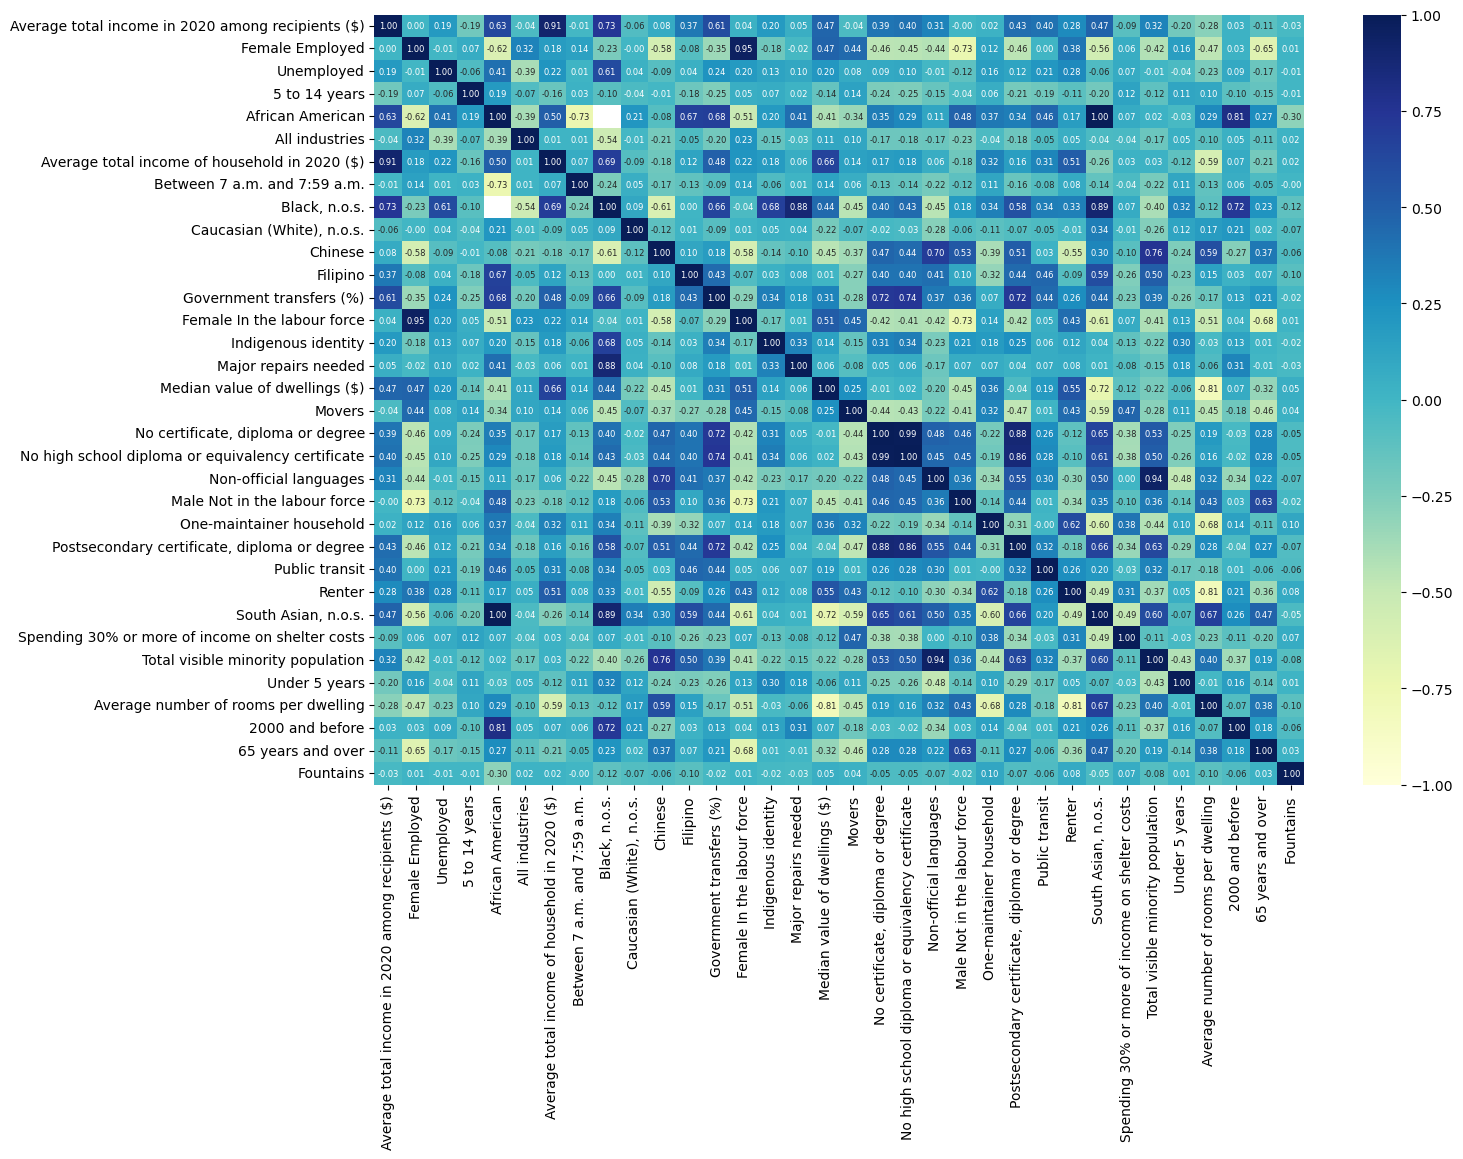

In [646]:
fig = plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, fmt='.2f', annot_kws={"fontsize": 6}, cmap='YlGnBu', vmin=-1, vmax=1)

# Dividing the correlation value higher than 0.9

In [647]:
def find_high_correlation(corr_matrix, threshold, variable_names):
    features = []
    Nvar = corr_matrix.shape[0]
    
    for i in range(Nvar):
        for j in range(i + 1, Nvar):
            if abs(corr_matrix[i, j]) > threshold:
                var1 = variable_names[i]
                var2 = variable_names[j]
                features.append((var1, var2, corr_matrix[i, j]))
    
    return features

corr_features = find_high_correlation(corr_matrix.values, 0.9, variable_names)
corr_features

[('Average total income in 2020 among recipients ($)',
  'Average total income of household in 2020 ($)',
  0.91),
 ('Female Employed', 'Female In the labour force', 0.955),
 ('African American', 'South Asian, n.o.s.', 1.0),
 ('No certificate, diploma or degree',
  'No high school diploma or equivalency certificate',
  0.987),
 ('Non-official languages', 'Total visible minority population', 0.94)]

# Dropping some variables after correlation matrix

In [652]:
 variables_to_drop = ['  Average total income in 2020 among recipients ($)', '  Female In the labour force', '  South Asian, n.o.s.',
                     '  No high school diploma or equivalency certificate', '  Non-official languages']

# Removing spaces and convert to lowercase
variables_to_drop = [column.strip().lower() for column in variables_to_drop]
merged_df_dropped

,female employed,unemployed,5 to 14 years,african american,all industries,average total income of household in 2020 ($),between 7 a.m. and 7:59 a.m.,"black, n.o.s.","caucasian (white), n.o.s.",chinese,...,"postsecondary certificate, diploma or degree",public transit,renter,spending 30% or more of income on shelter costs,total visible minority population,under 5 years,average number of rooms per dwelling,2000 and before,65 years and over,fountains
0,61.8,6.8,23.7,NaN,96.3,89.5,23.1,NaN,NaN,12.7,...,39.8,11.5,27.8,22.6,33.1,10.5,7.2,77.8,27.8,0.0
1,68.1,4.3,21.9,NaN,100.0,89.7,17.1,NaN,NaN,21.8,...,35.1,14.6,29.5,26.7,33.6,21.9,6.5,86.3,31.8,0.0
2,70.0,3.6,9.5,NaN,96.1,91.3,18.2,NaN,1.6,21.9,...,41.3,29.5,38.5,23.1,45.3,4.8,5.4,59.7,17.3,0.0
3,74.6,8.4,17.9,NaN,99.1,94.5,23.6,NaN,2.0,15.3,...,37.4,38.9,78.5,44.3,40.9,7.7,3.3,58.3,6.3,0.0
4,52.6,10.8,19.4,NaN,96.2,91.3,20.0,NaN,NaN,40.4,...,50.6,17.1,44.4,30.6,64.9,NaN,6.0,75.0,30.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,63.4,4.4,19.0,NaN,100.0,86.6,20.6,NaN,3.8,9.0,...,12.8,6.3,9.9,24.0,23.2,9.5,4.7,91.2,21.8,0.0
1019,73.8,4.7,18.2,NaN,99.2,90.9,23.2,NaN,NaN,9.2,...,17.5,14.5,56.9,23.5,24.9,10.9,3.7,97.1,15.7,0.0
1020,45.2,7.1,15.9,NaN,98.6,91.2,21.2,NaN,NaN,22.4,...,50.9,26.9,56.5,26.1,64.2,7.2,5.2,71.6,21.7,0.0
1021,43.1,7.9,13.4,NaN,97.3,92.0,30.4,NaN,NaN,50.3,...,46.8,15.2,39.6,20.8,91.2,2.4,5.8,72.9,29.3,4.2


In [653]:
merged_df_dropped.to_csv('Final_version.csv')